# Comparison of $f_0$ contours 

In this notebook we compare the results of three state-of-the-art $f_0$ extractors: pYIN, CREPE and SAC (not publicly available).

#### STEPS

1. Convert pYIN output to constant hopsize and unvoiced frames labeled as 0.
2. Resample $f_0$ contours to a common timebase, i.e. SAC's timebase of 5 ms.
3. Read three versions of contours per file and plot them together.
4. Compute frame-wise differences between algorithms and plot them.
5. Further steps include quantify how similar they are: similarity measures or distances. Difficult to obtain a number to generalize.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import mir_eval

import os


In [3]:
cr_path = '../pitch/CREPE/'
py_path = '../pitch/pYIN/'
sac_path = '../pitch/SAC/'

for fn in os.listdir(cr_path):
    
    joint_data = []
    
    print(fn)
    
    if not fn.endswith('csv'): continue
        
    sac = np.loadtxt(os.path.join(sac_path, fn[:-3]+'f0'))
    timebase = sac[:, 0]
    sac_fr, sac_voic = mir_eval.melody.freq_to_voicing(sac[:, 1])
    sac_freq, _ = mir_eval.melody.resample_melody_series(sac[:, 0], sac[:, 1], sac_voic, timebase, kind='linear')
    
    
    cr = np.array(pd.read_csv(os.path.join(cr_path, fn), header=None))
    
    # use confidence to filter out unvoiced frames, threshold=0.5
    cr[np.where(cr[:,-1] <= 0.5)[0],1] = 0
    cr_fr, cr_voic = mir_eval.melody.freq_to_voicing(cr[:, 1])
    cr_freq, _ = mir_eval.melody.resample_melody_series(cr[:, 0], cr[:, 1], cr_voic, timebase, kind='linear')
    

    # a few tricks to add unvoiced frames to pyin info
    pyi = np.array(pd.read_csv(os.path.join(py_path, fn), header=None))

    fs = 22050.0
    hopsize = 256
    l_samples = timebase[-1] * fs
    time_pyin = mir_eval.melody.constant_hop_timebase(hop=hopsize, end_time=l_samples) / fs

    # times_pyin uses the same hopsize as the original pyin so we can directly compare them
    pyin_new = np.zeros([len(time_pyin), 2])
    _, _, idx_y = np.intersect1d(np.float32(pyi[:,0]), np.float32(time_pyin), return_indices=True)
    
    pyin_new[idx_y, 1] = pyi[:, 1]
    pyin_new[:, 0] = time_pyin
    

    pyi_fr, pyi_voic = mir_eval.melody.freq_to_voicing(pyin_new[:, 1])
    pyi_freq, _ = mir_eval.melody.resample_melody_series(pyin_new[:, 0], pyin_new[:, 1], 
                                                         pyi_voic, timebase, kind='linear')
    
    # create joint data and store
    joint_data.append(timebase)
    joint_data.append(cr_freq)
    joint_data.append(pyi_freq)
    joint_data.append(sac_freq)
    
    np.save(os.path.join(
        '../pitch/joint_data', fn[:-3] + 'npy'), joint_data)
    
    
    
    # Compare pairs of f0 tracks frame-wise by computing differences in f0
    
    d_cr_pyi = np.abs(
        cr_freq - pyi_freq)
    
    d_cr_sac = np.abs(
        cr_freq - sac_freq)
    
    d_pyi_sac = np.abs(
        pyi_freq - sac_freq)
    
    '''uncomment this chunk of code for visualization and plot creation
    
    # VIZ
    plt.figure(figsize=(20,15))
    plt.subplot(311), plt.plot(timebase, cr_freq, '.r'), plt.xlabel('Time (sec)'), plt.ylabel('Frequency (Hz)')
    plt.title('CREPE f0 estimation', fontsize=15)
    plt.subplot(312), plt.plot(timebase, pyi_freq, '.k'), plt.xlabel('Time (sec)'), plt.ylabel('Frequency (Hz)')
    plt.title('pYIN f0 estimation', fontsize=15)
    plt.subplot(313), plt.plot(timebase, sac_freq, '.g'), plt.xlabel('Time (sec)'), plt.ylabel('Frequency (Hz)')
    plt.title('SAC f0 estimation', fontsize=15)
    
    plt.tight_layout()
    plt.savefig('../pitch/figs/' + fn[:-4]+'_f0.png', format='png')
    
    plt.figure(figsize=(20,15))
    plt.subplot(311), plt.plot(timebase, d_cr_pyi, '.r')#, plt.ylim([0, 70])
    plt.xlabel('Time (sec)'), plt.ylabel('Frequency (Hz)')
    plt.title('CREPE-pYIN f0 difference', fontsize=15)
    plt.subplot(312), plt.plot(timebase, d_cr_sac, '.k')#, plt.ylim([0, 70])
    , plt.xlabel('Time (sec)'), plt.ylabel('Frequency (Hz)')
    plt.title('CREPE-SAC f0 difference', fontsize=15)
    plt.subplot(313), plt.plot(timebase, d_pyi_sac, '.g')#, plt.ylim([0, 70])
    , plt.xlabel('Time (sec)'), plt.ylabel('Frequency (Hz)')
    plt.title('pYIN-SAC f0 difference', fontsize=15)
    
    plt.tight_layout()    
    plt.savefig('../pitch/figs/' + fn[:-4]+'_diff.png', format='png')
    
    '''
    
    
    

DLI_QuartetA_Take5_T1_DYN.csv
DLI_QuartetB_Take5_A2_HSM.csv
DLI_QuartetB_Take5_S1_LRX.csv
DLI_QuartetB_Take4_B2_LRX.csv
DLI_QuartetA_Take4_T1_HSM.csv
DLI_All_Take1_S1_LRX.csv
DLI_QuartetA_Take1_A1_LRX.csv
DLI_All_Take1_A2_HSM.csv
DLI_QuartetA_Take1_B1_DYN.csv
DLI_QuartetB_Take4_A2_DYN.csv
DLI_All_Take3_A1_LRX.csv
DLI_QuartetA_Take4_T1_LRX.csv
DLI_QuartetB_Take4_B2_HSM.csv
DLI_QuartetA_Take1_A1_HSM.csv
DLI_QuartetA_Take1_S2_LRX.csv
DLI_All_Take1_A2_LRX.csv
DLI_All_Take3_S2_LRX.csv
DLI_QuartetB_Take1_T2_DYN.csv
DLI_All_Take1_B2_DYN.csv
DLI_QuartetB_Take4_S1_DYN.csv
DLI_QuartetB_Take5_B2_DYN.csv
DLI_All_Take2_B1_LRX.csv
DLI_QuartetB_Take5_A2_LRX.csv
DLI_All_Take3_T1_LRX.csv
DLI_QuartetB_Take1_S1_DYN.csv
DLI_QuartetB_Take4_T2_DYN.csv
DLI_QuartetA_Take4_A1_HSM.csv
DLI_QuartetA_Take4_S2_LRX.csv
DLI_All_Take1_T2_HSM.csv
DLI_QuartetB_Take1_B2_HSM.csv
DLI_QuartetA_Take1_T1_LRX.csv
DLI_QuartetA_Take5_B1_LRX.csv
DLI_QuartetB_Take5_T2_HSM.csv
DLI_QuartetA_Take5_A1_DYN.csv
DLI_QuartetB_Take5_T2_LRX

### Discussion of the plots

There are a few things to point out:
* When we read data extracted by CREPE we use the third column, i.e. pitch confidence, to threshold the voiced vs. unvoiced frames. We use 0.5 by default, but there are a few passages with leakage from other voices, and in these passages this threshold reports f0 values that correspond to other microphones. This is very clear in the bass part: they don't sing in the middle of the song, but with this threshold, CREPE reports the melody sung by other voices. We need to adapt the threshold.


* Apart from this, differences between algorithms are not very relevant in general. They increase at the beginning and end of the notes, but the stable parts of the notes are quite similar. 


* These are conclusions extracted from the plots. It would be interesting to see which are the specific parts where differences are larger. A plot with the mean of the three contours and the deviation might help detecting parts where they differ; however, we might need to solve the thresholding issue first, otherwise the deviation will peak at these places, which are not interesting for this analysis.

## More plots

### Running the next chunk of code is VERY slow. Figures are already created and stored in the Drive folder.

**Note**: I guess there are other ways of doing this kind of plots which are much faster to run, but for now, this is what we have.

These plots correspond to the mean values between the three algorithms and are color-coded according to the standard deviation at each frame. We used four colors to easily detect the regions of the signal where the three algorithms disagree (red). 

When the deviation is less than 30 Hz, points are green; yellow between 30 and 70; orange between 70 and 100; and larger than 100 (strong disagreement) they are plotted in red.

KeyboardInterrupt: 

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x1171f0ea0> (for post_execute):


KeyboardInterrupt: 

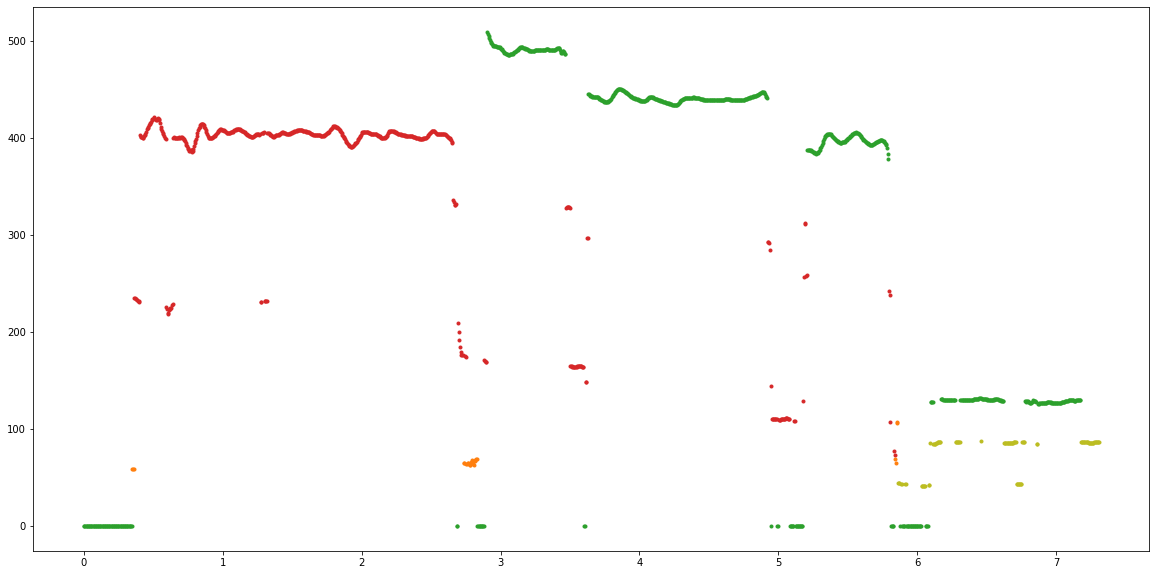

In [2]:
# use npy files created above
# plotting each sample separately is SUPER SLOW but it is potentially useful to see what's happening
'''
npy_path = '../pitch/joint_data'

for fn in os.listdir(npy_path): 
    
    if not fn.endswith('npy'): continue
    
    data = np.load(os.path.join(npy_path, fn))
    timebase, crepe, pyin, sac = data[0], data[1], data[2], data[3]
    
    f0s = np.concatenate([crepe[:,None], pyin[:,None], sac[:,None]], axis=1)
    means = f0s.mean(axis=1)
    stds = f0s.std(axis=1)
    
    clrs = []
    for val in stds:
        if val <= 30:
            clrs.append('#2ca02c')
        elif (val > 30) and (val <= 70):
            clrs.append('#bcbd22')
        elif (val > 70) and (val <= 100):
            clrs.append('#ff7f0e')
        elif val > 100:
            clrs.append('#d62728')
        else:
            clrs.append('k')

    plt.figure(figsize=(20,10))
    
    i=-1
    for m, c in zip(means, clrs):
        i+=1
        
        plt.plot(timebase[i], m, '.', color=c)

        
    plt.savefig(
        os.path.join('../pitch/joint_data', fn[:-3] + 'png'), 
        format='png')

    print("{} plot saved".format(fn))
            
'''   
        